# Introduction

**Project Objectives :**

- Conduct a preliminary feasibility study of an item classification engine, based on textual description and/or images, for automating item categorization.
- Analyze the dataset by preprocessing product descriptions and images, reducing dimensionality, and performing clustering. The results of dimensionality reduction and clustering will be presented in two-dimensional graphs and confirmed by similarity calculation (e.g., ARI) between real categories and clusters.
- Train Natural Language Processing (NLP) and computer vision models to classify items.

To extract textual features, we will implement several approaches :
- Two "bag-of-words" approaches: simple word counting and TF-IDF.
- A traditional word/sentence embedding approach using Word2Vec.
- A word/sentence embedding approach using BERT.
- A word/sentence embedding approach using USE (Universal Sentence Encoder).

To extract image features, we will use two strategies :
- An algorithm such as SIFT / ORB / SURF.
- A CNN Transfer Learning-based algorithm.

This notebook is dedicated to text data preprocessing, the notebook **text-clustering-and-classification** to item clustering and classification using text data, and the notebook **image-clustering-and-classification** to item clustering and classification using images.

In [59]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('words')
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import words, stopwords

from wordcloud import WordCloud

import string

In [2]:
df = pd.read_csv('./data/flipkart_com-ecommerce_sample_1050.csv')
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


# Quick look at the data

Let's look at a few samples

In [3]:
df.sample(5, random_state=0)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
743,d47f1cb78db4a23e2516e2d34da34c8a,2015-12-12 11:46:53 +0000,http://www.flipkart.com/nutcase-sticker-wrap-d...,Nutcase Sticker Wrap Design - Pineapple 800 ml...,"[""Kitchen & Dining >> Containers & Bottles >> ...",BOTEANCH6ZZZHJVD,799.0,399.0,d47f1cb78db4a23e2516e2d34da34c8a.jpg,False,Nutcase Sticker Wrap Design - Pineapple 800 ml...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Body Mater..."
656,260c74b5a09272dec1a8207db3541a0d,2015-12-31 09:19:31 +0000,http://www.flipkart.com/bornbabykids-cotton-ba...,BornBabyKids Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEE2FFGXVH3MFW,649.0,589.0,260c74b5a09272dec1a8207db3541a0d.jpg,False,Buy BornBabyKids Cotton Bath Towel at Rs. 589 ...,No rating available,No rating available,BornBabyKids,"{""product_specification""=>[{""key""=>""Hooded"", ""..."
704,7915f1c0703450d4b1446c06066d9a59,2016-01-01 19:37:22 +0000,http://www.flipkart.com/home-originals-abstrac...,"Home Originals Abstract, Abstract Double Blank...","[""Home Furnishing >> Bed Linen >> Blankets, Qu...",BLAEE2GJHZHDRDNK,2999.0,1299.0,7915f1c0703450d4b1446c06066d9a59.jpg,False,"Buy Home Originals Abstract, Abstract Double B...",No rating available,No rating available,Home Originals,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
738,5fdb912462da9891e5b21c677ceb15e4,2016-06-26 09:25:14 +0000,http://www.flipkart.com/brass-gift-center-show...,brass gift center Showpiece - 48 cm,"[""Home Decor & Festive Needs >> Religion & Dev...",SHIEJY5HPVJT9MUE,7999.0,4550.0,5fdb912462da9891e5b21c677ceb15e4.jpg,False,Key Features of brass gift center Showpiece -...,No rating available,No rating available,brass gift center,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
496,087e83a2406dc98d941b8555356da477,2016-01-07 05:50:25 +0000,http://www.flipkart.com/sonata-7016ym04-watch/...,Sonata 7016YM04 Watch,"[""Watches >> Wrist Watches >> Sonata Wrist Wat...",WATDZ2ZQE9C7GQVK,840.0,789.0,087e83a2406dc98d941b8555356da477.jpg,False,Sonata 7016YM04 Watch - Buy Sonata 7016YM04 Wa...,No rating available,No rating available,NaN,"{""product_specification""=>{""key""=>""Style Code""..."


For text data analysis we are going to use the **description** column and possibly the **product_name** column for the bag-of-words.
<br>
The **product_category_tree** column will be used to label the data.

Data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [5]:
df.dtypes.value_counts()

object     12
float64     2
bool        1
Name: count, dtype: int64

number of unique values

In [6]:
df.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

Number of unique product names

In [211]:
len(df['product_name'].unique())

1050

Number of unique product names once converted to lowercase

In [212]:
len(df['product_name'].str.lower().unique())

1048

NaN values

In [7]:
df.isna().sum().sort_values(ascending=False)[:5]

brand                     338
retail_price                1
discounted_price            1
product_specifications      1
uniq_id                     0
dtype: int64

duplicates

In [8]:
df.duplicated().sum()

0

In [9]:
# Let's look at the number of duplicates by column
n_duplicates = {}
for col in df.columns:
    if df[col].dtype == "object":
        # lowercase before checking duplicates
        n_duplicates[col] = df[col].str.lower().duplicated().sum()
        continue
    n_duplicates[col] = df.duplicated(subset=col).sum()

pd.DataFrame(data={"# duplicates": n_duplicates})

,# duplicates
brand,564
crawl_timestamp,901
description,0
discounted_price,625
image,0
is_FK_Advantage_product,1048
overall_rating,1023
pid,0
product_category_tree,411
product_name,2


Decribe

In [216]:
df.describe()

,retail_price,discounted_price
count,1049.000000,1049.000000
mean,2186.197331,1584.527169
std,7639.229411,7475.099680
min,35.000000,35.000000
25%,555.000000,340.000000
50%,999.000000,600.000000
75%,1999.000000,1199.000000
max,201000.000000,201000.000000


In [217]:
df.describe(include=object)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,image,description,product_rating,overall_rating,brand,product_specifications
count,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,712,1049
unique,1050,149,1050,1050,642,1050,1050,1050,27,27,490,984
top,55b85ea15a1536d46b7190ad6fff8ce7,2015-12-01 12:40:44 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",CRNEG7BKMFFYHQ8Z,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,PRINT SHAPES,"{""product_specification""=>[{""key""=>""Type"", ""va..."
freq,1,150,1,1,56,1,1,1,889,889,11,22


# Exploratory Data Analysis

We first select the columns in which we are interested.

In [10]:
df_text = df[['product_name','description', 'product_category_tree']]
df_text.head()

,product_name,description,product_category_tree
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,"[""Home Furnishing >> Curtains & Accessories >>..."
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."


## Categories

We are going to extract the categories from the **product_category_tree** column.

In [11]:
# number of unique values
df_text['product_category_tree'].unique().size

642

In [12]:
df_text['product_category_tree'].sample(10).values

array(['["Home Furnishing >> Curtains & Accessories >> Curtains >> Ville Style Polyester Maroon Floral Eyelet Door ..."]',
       '["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Lal Haveli Ethnic"]',
       '["Watches >> Wrist Watches >> Perucci Wrist Watches"]',
       '["Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars"]',
       '["Kitchen & Dining >> Cookware >> Pots & Pans >> Woks & Kadhais >> Kalash Woks & Kadhais"]',
       '["Beauty and Personal Care >> Body and Skin Care >> Face Care >> Sunscreen >> Oriflame Sweden Sunscreen"]',
       '["Computers >> Tablet Accessories >> Keyboards >> RoQ Keyboards >> RoQ Slim Multimedia 105key Flexible Wired USB Fl..."]',
       '["Home Decor & Festive Needs >> Table Decor & Handicrafts >> Showpieces >> Religious Idols >> Diviniti Religious Idols"]',
       '["Watches >> Wrist Watches >> Sonata Wrist Watches"]',
       '["Kitchen & Dining >> Kitchen Tools >> Kitchen Implements >> Pizza Cutters >> King International Pizza Cu

In [13]:
# remove special characters
df_text.loc[:, 'product_category_tree'] = df_text['product_category_tree'].str.replace('[', '')
df_text.loc[:, 'product_category_tree'] = df_text['product_category_tree'].str.replace('"', '')
df_text.loc[:, 'product_category_tree'] = df_text['product_category_tree'].str.replace(']', '')
df_text.loc[:, 'product_category_tree'].sample(10)

2       Baby Care >> Baby Bath & Skin >> Baby Bath Tow...
723     Home Furnishing >> Kitchen & Dining Linen >> T...
281     Home Furnishing >> Living >> Sofa Covers >> Bh...
612     Baby Care >> Feeding & Nursing >> Bibs & Hanki...
45      Kitchen & Dining >> Coffee Mugs >> AKUP Coffee...
1007    Beauty and Personal Care >> Bath and Spa >> So...
242     Kitchen & Dining >> Cookware >> Pots & Pans >>...
868               Home Furnishing >> Bath Linen >> Towels
521      Watches >> Wrist Watches >> Maxima Wrist Watches
328     Beauty and Personal Care >> Fragrances >> Deod...
Name: product_category_tree, dtype: object

In [14]:
# transform paths into list of strings
df_text.loc[:, 'product_category_tree'] = df_text['product_category_tree'].str.split('>>')
df_text['product_category_tree']

0       [Home Furnishing ,  Curtains & Accessories ,  ...
1       [Baby Care ,  Baby Bath & Skin ,  Baby Bath To...
2       [Baby Care ,  Baby Bath & Skin ,  Baby Bath To...
3       [Home Furnishing ,  Bed Linen ,  Bedsheets ,  ...
4       [Home Furnishing ,  Bed Linen ,  Bedsheets ,  ...
                              ...                        
1045    [Baby Care ,  Baby & Kids Gifts ,  Stickers , ...
1046    [Baby Care ,  Baby & Kids Gifts ,  Stickers , ...
1047    [Baby Care ,  Baby & Kids Gifts ,  Stickers , ...
1048    [Baby Care ,  Baby & Kids Gifts ,  Stickers , ...
1049    [Baby Care ,  Baby & Kids Gifts ,  Stickers , ...
Name: product_category_tree, Length: 1050, dtype: object

In [15]:
# keep only the first element of the list that corresponds to the object category
categories = df_text['product_category_tree'].apply(lambda x: x[0])
categories

0       Home Furnishing 
1             Baby Care 
2             Baby Care 
3       Home Furnishing 
4       Home Furnishing 
              ...       
1045          Baby Care 
1046          Baby Care 
1047          Baby Care 
1048          Baby Care 
1049          Baby Care 
Name: product_category_tree, Length: 1050, dtype: object

In [16]:
categories.unique().size

7

In [17]:
categories.unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

In [21]:
# remove leading and trailing whitespaces
categories = categories.str.strip()

In [22]:
categories.unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [23]:
categories.value_counts()

product_category_tree
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: count, dtype: int64

The dataset is balanced : we have an equal number of samples in each category.

In [24]:
df_text = df_text.assign(category=categories)
# df_text.insert(3, "category", categories)
df_text = df_text.drop(columns=['product_category_tree'])
df_text.head()

,product_name,description,category
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing


## Description length

In [25]:
len_descriptions = df_text['description'].apply(lambda text: len(text))
len_descriptions.head()

0    1420
1     444
2    1258
3     858
4    1197
Name: description, dtype: int64

In [26]:
len_descriptions.describe()

count    1050.000000
mean      473.820952
std       457.910422
min       109.000000
25%       192.000000
50%       278.000000
75%       588.250000
max      3490.000000
Name: description, dtype: float64

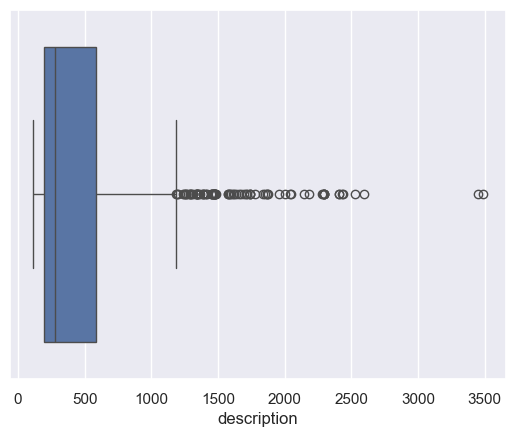

In [27]:
sns.boxplot(x=len_descriptions);

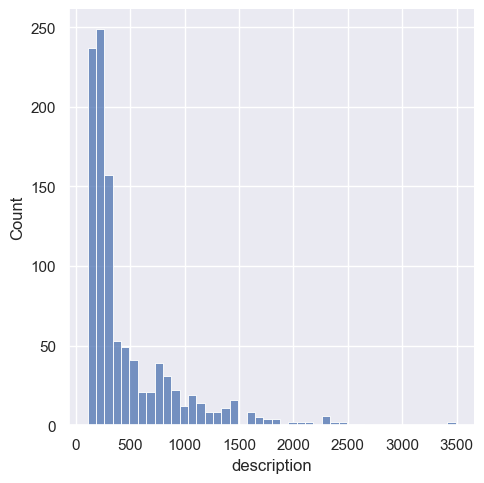

In [28]:
sns.displot(len_descriptions);

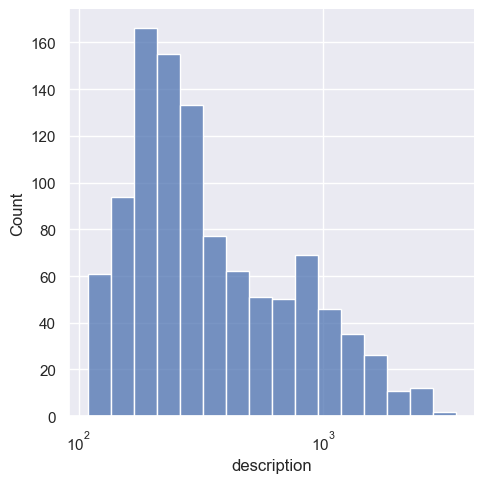

In [29]:
sns.displot(len_descriptions, log_scale=True);

## Corpus and documents exploration

In [30]:
df_text_samp = df_text.sample(10, random_state=0)
df_text_samp

,product_name,description,category
743,Nutcase Sticker Wrap Design - Pineapple 800 ml...,Nutcase Sticker Wrap Design - Pineapple 800 ml...,Kitchen & Dining
656,BornBabyKids Cotton Bath Towel,Buy BornBabyKids Cotton Bath Towel at Rs. 589 ...,Baby Care
704,"Home Originals Abstract, Abstract Double Blank...","Buy Home Originals Abstract, Abstract Double B...",Home Furnishing
738,brass gift center Showpiece - 48 cm,Key Features of brass gift center Showpiece -...,Home Decor & Festive Needs
496,Sonata 7016YM04 Watch,Sonata 7016YM04 Watch - Buy Sonata 7016YM04 Wa...,Watches
27,Disney DW100405 Digital Watch - For Boys,Disney DW100405 Digital Watch - For Boys - Bu...,Watches
31,"Lenco Bdblue Tango Analog Watch - For Men, Boys","Lenco Bdblue Tango Analog Watch - For Men, Bo...",Watches
553,Sonata 8974PP01 Analog Watch - For Women,Sonata 8974PP01 Analog Watch - For Women - Bu...,Watches
682,VLCC Natural Sciences Oil Free Sunscreen Gel S...,Flipkart.com: Buy VLCC Natural Sciences Oil Fr...,Beauty and Personal Care
495,Sonata 7007YL08 Watch,Sonata 7007YL08 Watch - Buy Sonata 7007YL08 Wa...,Watches


In [31]:
# display the first 100 characters of the sample descriptions
[val[:100] for val in df_text_samp['description'].values]

['Nutcase Sticker Wrap Design - Pineapple 800 ml Bottle (Pack of 1, Multicolor)\r\n                     ',
 'Buy BornBabyKids Cotton Bath Towel at Rs. 589 at Flipkart.com. Only Genuine Products. Free Shipping.',
 'Buy Home Originals Abstract, Abstract Double Blanket Multicolor at Rs. 1299 at Flipkart.com. Only Ge',
 'Key Features of brass gift center Showpiece  -  48 cm Brass Height - 48 cm Width - 12 cm Weight - 37',
 'Sonata 7016YM04 Watch - Buy Sonata 7016YM04 Watch  7016YM04 Online at Rs.789 in India Only at Flipka',
 'Disney DW100405 Digital Watch  - For Boys - Buy Disney DW100405 Digital Watch  - For Boys  DW100405 ',
 'Lenco Bdblue Tango Analog Watch  - For Men, Boys - Buy Lenco Bdblue Tango Analog Watch  - For Men, B',
 'Sonata 8974PP01 Analog Watch  - For Women - Buy Sonata 8974PP01 Analog Watch  - For Women  8974PP01 ',
 'Flipkart.com: Buy VLCC Natural Sciences Oil Free Sunscreen Gel SPF 15 (Pack of 2) - SPF 15 for Rs. 2',
 'Sonata 7007YL08 Watch - Buy Sonata 7007YL08 Watch  

In [32]:
df_text_samp['description'].iloc[1]

'Buy BornBabyKids Cotton Bath Towel at Rs. 589 at Flipkart.com. Only Genuine Products. Free Shipping. Cash On Delivery!'

# Text Processing

## Building the raw corpus

In [33]:
# The documents will consist of the product name and its description
df_text['text'] = df_text['product_name'] + ' ' + df_text['description']
df_text.head()

,product_name,description,category,text
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Elegance Polyester Multicolor Abstract Eyelet ...
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Sathiyas Cotton Bath Towel Specifications of S...
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Eurospa Cotton Terry Face Towel Set Key Featur...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,SANTOSH ROYAL FASHION Cotton Printed King size...
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Jaipur Print Cotton Floral King sized Double B...


In [34]:
# build corpus
raw_corpus = ' '.join(df_text['text'].values)
raw_corpus[:1000]

'Elegance Polyester Multicolor Abstract Eyelet Door Curtain Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant

## Preprocessing operations

### Lowercase

In [35]:
corpus_lower = raw_corpus.lower().strip()
corpus_lower[:1000]

'elegance polyester multicolor abstract eyelet door curtain key features of elegance polyester multicolor abstract eyelet door curtain floral curtain,elegance polyester multicolor abstract eyelet door curtain (213 cm in height, pack of 2) price: rs. 899 this curtain enhances the look of the interiors.this curtain is made from 100% high quality polyester fabric.it features an eyelet style stitch with metal ring.it makes the room environment romantic and loving.this curtain is ant- wrinkle and anti shrinkage and have elegant apparance.give your home a bright and modernistic appeal with these designs. the surreal attention is sure to steal hearts. these contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. bring home the elegant

In [36]:
len(corpus_lower)

546968

### Tokenization

In [37]:
tokens = word_tokenize(corpus_lower)
tokens[:10]

['elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'key',
 'features',
 'of']

In [38]:
def display_tokens_info(tokens, n=20):
    """
    display info about the corpus and n tokens
    """
    print(f'# tokens : {len(tokens)}\n# unique tokens : {len(set(tokens))}')
    if n > 0 :
        print("some tokens :", list(set(tokens))[:n], sep="\n")

In [40]:
display_tokens_info(tokens)

# tokens : 99490
# unique tokens : 6625
some tokens :
['smoothly', 'vrct', 'born', 'rubberized', 'multicoloured', 'patterns', 'bedsheet,2', 'curl', 'guarantee', 'viscose', 'digilight', 'furnace', 'daughter', 'gridding', 'lifestyle-you', 'cuteness', 'absorbency', 'sticker', 'hard', 'vgn-cr190e/r']


### Stopwords

In [41]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [42]:
# remove stopwords
tokens = [w for w in tokens if w not in stop_words]
display_tokens_info(tokens)

# tokens : 79896
# unique tokens : 6508
some tokens :
['smoothly', 'vrct', 'born', 'rubberized', 'multicoloured', 'patterns', 'bedsheet,2', 'curl', 'guarantee', 'viscose', 'digilight', 'furnace', 'daughter', 'gridding', 'lifestyle-you', 'cuteness', 'absorbency', 'sticker', 'hard', 'vgn-cr190e/r']


### Punctuation

In [43]:
tokens = [w for w in tokens if w not in string.punctuation]
display_tokens_info(tokens)

# tokens : 67184
# unique tokens : 6487
some tokens :
['smoothly', 'vrct', 'born', 'rubberized', 'multicoloured', 'patterns', 'bedsheet,2', 'curl', 'guarantee', 'viscose', 'digilight', 'furnace', 'daughter', 'gridding', 'lifestyle-you', 'cuteness', 'absorbency', 'sticker', 'hard', 'vgn-cr190e/r']


### Rare tokens

In [44]:
tokens_value_counts = pd.Series(tokens).value_counts()
tokens_value_counts[:10]

cm             652
products       632
free           617
rs             592
buy            582
replacement    568
delivery       567
genuine        564
cash           564
shipping       564
Name: count, dtype: int64

In [45]:
tokens_value_counts.describe()

count    6487.000000
mean       10.356713
std        38.855418
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max       652.000000
Name: count, dtype: float64

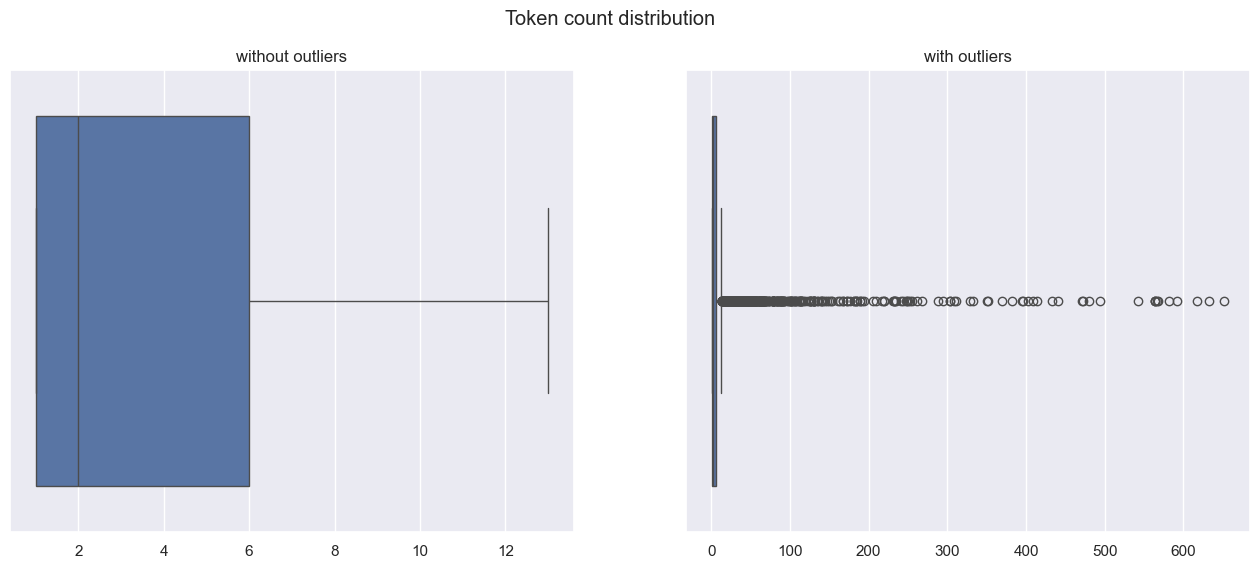

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
sns.boxplot(x=tokens_value_counts.values, showfliers=False, ax=axs[0])
sns.boxplot(x=tokens_value_counts.values, showfliers=True, ax=axs[1])
fig.suptitle("Token count distribution")
axs[0].set_title("without outliers")
axs[1].set_title("with outliers")
plt.show()

In [47]:
unique_words = list(tokens_value_counts[tokens_value_counts == 1].index)
unique_words[:10]

['2nd',
 'instruments',
 'bollywood',
 'calnedars',
 'daily.',
 'stir-up',
 'thrillers',
 'buzz.',
 'vsswh001',
 'sole']

In [48]:
len(unique_words)

1871

We remove tokens that appear a single time in the corpus

In [49]:
tokens = [w for w in tokens if w not in unique_words]
display_tokens_info(tokens)

# tokens : 65313
# unique tokens : 4616
some tokens :
['smoothly', 'vrct', 'rama', 'e-1700-906_blk', 'lbp', 'born', 'multicoloured', 'enamel', 'patterns', 'vgn-cr305e/l', 'subtle', 'giving', 'insert', 'bedsheet,2', 'strength', 'lines', 'curl', 'guarantee', 'textiles', 'viscose']


### Short words

In [50]:
# remove words made up of less than `min_len_words` character
min_len_words = 3
tokens = [w for w in tokens if len(w) >= min_len_words]

In [51]:
display_tokens_info(tokens)

# tokens : 59717
# unique tokens : 4449
some tokens :
['smoothly', 'vrct', 'rama', 'e-1700-906_blk', 'lbp', 'born', 'multicoloured', 'enamel', 'patterns', 'vgn-cr305e/l', 'subtle', 'giving', 'insert', 'bedsheet,2', 'strength', 'lines', 'curl', 'guarantee', 'textiles', 'viscose']


### Alphabetic tokens

In [52]:
# remove tokens that contain numbers
tokens = [w for w in tokens if w.isalpha()]
display_tokens_info(tokens)

# tokens : 55568
# unique tokens : 3584
some tokens :
['smoothly', 'vrct', 'rama', 'lbp', 'born', 'multicoloured', 'enamel', 'patterns', 'contamination', 'subtle', 'giving', 'insert', 'strength', 'lines', 'curl', 'guarantee', 'textiles', 'viscose', 'design', 'digilight']


### English words

In [53]:
eng_words = [w.lower() for w in words.words()] # all lowercase English dictionary words
eng_words[:10]

['a',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'aani',
 'aardvark',
 'aardwolf',
 'aaron']

In [54]:
len(eng_words)

236736

In [55]:
len(set(eng_words))

234377

Corpus words not in the dictionary

In [56]:
%%time
non_eng_tokens = [w for w in tokens if w not in eng_words]
display_tokens_info(non_eng_tokens)

# tokens : 12329
# unique tokens : 1260
some tokens :
['vrct', 'lbp', 'multicoloured', 'patterns', 'lines', 'textiles', 'digilight', 'flipkart', 'brahmz', 'lovelly', 'printland', 'discounts', 'awakened', 'oxyglow', 'replaced', 'exports', 'colours', 'conforms', 'multicolour', 'adapters']
CPU times: total: 1min 53s
Wall time: 2min 3s


We can see that some words are indeed not in the dictionary, but some have not been recognized as such because they are in a plural form for example.
Additionally, some non-English words may still be useful as they characterize a certain type of product, such as a brand name for instance. Therefore, it might be better to keep them.

### Lemmatization

The process of **lemmatization** involves representing words (or *lemmas*) in their canonical form. For a verb, it will be its infinitive form. For a noun, it will be its singular masculine form.

#### Examples

In [57]:
sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."
sentence

'He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun.'

In [60]:
lemmatizer = WordNetLemmatizer()

sentence_tokens = nltk.word_tokenize(sentence)
print("{0:20}{1:20} \n".format("Word","Lemma") + '-'*30)
for word in sentence_tokens:
    print ("{0:20}{1:20}".format(word, lemmatizer.lemmatize(word)))

Word                Lemma                
------------------------------
He                  He                  
was                 wa                  
running             running             
and                 and                 
eating              eating              
at                  at                  
same                same                
time                time                
.                   .                   
He                  He                  
has                 ha                  
bad                 bad                 
habit               habit               
of                  of                  
swimming            swimming            
after               after               
playing             playing             
long                long                
hours               hour                
in                  in                  
the                 the                 
Sun                 Sun                 
.                   .    

#### Application

In [61]:
tokens_lem = [lemmatizer.lemmatize(w) for w in tokens]
display_tokens_info(tokens_lem)

# tokens : 55568
# unique tokens : 3306
some tokens :
['smoothly', 'vrct', 'rama', 'lbp', 'born', 'multicoloured', 'enamel', 'contamination', 'subtle', 'giving', 'insert', 'strength', 'curl', 'guarantee', 'viscose', 'design', 'digilight', 'sheet', 'furnace', 'holding']


### Stemming

Another process that serves a similar function is called **stemming**. Stemming involves retaining only the root of the words studied. The idea is to remove suffixes, prefixes, and other affixes from words to retain only their origin. It is a simpler process than lemmatization and faster to perform because it essentially truncates words, unlike lemmatization, which requires the use of a dictionary.

#### Examples

In [64]:
sentence="Pythoners are very intelligent and work very pythonly and now they are pythoning their way to success."
sentence

'Pythoners are very intelligent and work very pythonly and now they are pythoning their way to success.'

In [65]:
stemmer = PorterStemmer()

sentence_tokens = nltk.word_tokenize(sentence)
print("{0:20}{1:20} \n".format("Word","Porter Stemmer") + '-'*35)
for word in sentence_tokens:
    print ("{0:20}{1:20}".format(word, stemmer.stem(word)))

Word                Porter Stemmer       
-----------------------------------
Pythoners           python              
are                 are                 
very                veri                
intelligent         intellig            
and                 and                 
work                work                
very                veri                
pythonly            pythonli            
and                 and                 
now                 now                 
they                they                
are                 are                 
pythoning           python              
their               their               
way                 way                 
to                  to                  
success             success             
.                   .                   


#### Application

In [66]:
tokens_stem = [stemmer.stem(w) for w in tokens]
display_tokens_info(tokens_stem)

# tokens : 55568
# unique tokens : 2958
some tokens :
['nutcas', 'vrct', 'rama', 'exactli', 'dynam', 'lbp', 'born', 'enamel', 'insert', 'strength', 'curl', 'design', 'fanci', 'digilight', 'sheet', 'flipkart', 'fork', 'improv', 'brahmz', 'smoke']


### WordCloud

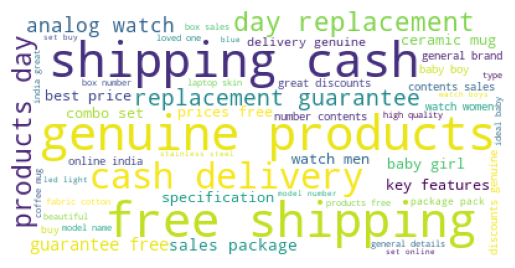

In [67]:
# without lemmatization nor stemming
wordcloud = WordCloud(background_color='white', 
                      stopwords=[], max_words=50, random_state=0).generate(' '.join(tokens))
plt.imshow(wordcloud)
plt.axis('off');

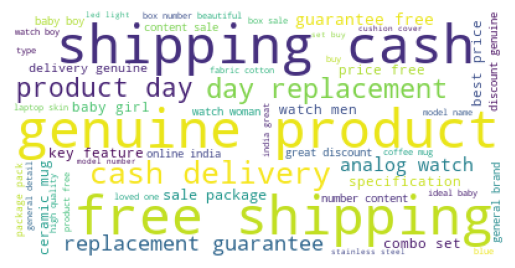

In [68]:
# with lemmatization
wordcloud = WordCloud(background_color='white', 
                      stopwords=[], max_words=50, random_state=0).generate(' '.join(tokens_lem))
plt.imshow(wordcloud)
plt.axis('off');

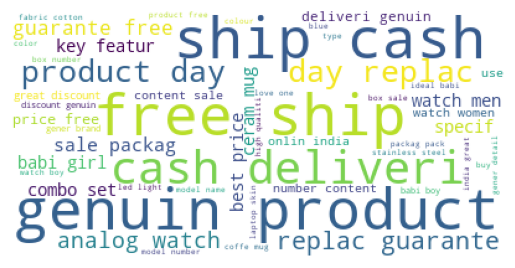

In [69]:
# with stemming
wordcloud = WordCloud(background_color='white', 
                      stopwords=[], max_words=50, random_state=0).generate(' '.join(tokens_stem))
plt.imshow(wordcloud)
plt.axis('off');

## **Text processing function**

We define function that allows us to apply all the processes we have seen before.

In [71]:
def process_text(doc, stop_words=None, list_rare_words=None, min_len_words=3, force_is_alpha=True,
                 extra_words=None, eng_words=None, lem_or_stem=None, rejoin=False):
    """
    Process a given document by applying various text processing steps.

    Parameters:
    -----------
    doc : str
        The document (a text in str format) to process.

    stop_words : list or None, optional
        List of stopwords to exclude from the document.

    list_rare_words : list or None, optional
        A list of rare words to exclude.

    min_len_words : int, optional
        The minimum length of words to include in the processed document.

    force_is_alpha : bool, optional
        If True, exclude all tokens that contain non-alphabetic characters.

    extra_words : list or None, optional
        List of extra words to exclude from the document.

    eng_words : list or None, optional
        List of English words to include in the processed document.

    lem_or_stem : str or None, optional
        If 'lem', lemmatizes the words; if 'stem', stems the words.

    rejoin : bool, optional
        If True, return the processed document as a single string; else return a list of tokens.

    Returns:
    --------
    list or str
        A list of tokens or a string if rejoin is True.
    """
    # Convert the document to lowercase and remove leading/trailing whitespaces
    doc = doc.lower().strip()

    # Tokenize the document
    tokens = word_tokenize(doc)

    ############################################################
    # Begin tokens processing
    ############################################################

    # Exclude classic stopwords if provided
    if stop_words:
        tokens = [w for w in tokens if w not in stop_words]

    # Exclude non-rare tokens if a list of rare words is provided
    if list_rare_words:
        tokens = [w for w in tokens if w not in list_rare_words]

    # Filter tokens based on minimum length requirement
    if min_len_words:
        tokens = [w for w in tokens if len(w) >= min_len_words]

    # Exclude tokens containing non-alphabetic characters if required
    if force_is_alpha:
        tokens = [w for w in tokens if w.isalpha()]

    # Drop extra words if provided
    if extra_words:
        tokens = [w for w in tokens if w not in extra_words]

    # Include only English words if a list is provided
    if eng_words:
        tokens = [w for w in tokens if w in eng_words]

    # Lemmatize or stem the tokens based on the specified method
    if lem_or_stem == 'lem':
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(w) for w in tokens]
    elif lem_or_stem == 'stem':
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(w) for w in tokens]

    ############################################################
    # End tokens processing
    ############################################################

    # Return the processed document as a single string if rejoin is True
    if rejoin:
        return ' '.join(tokens)

    # Return the list of tokens
    return tokens

Let's test the function

In [72]:
test = process_text(raw_corpus,
                    stop_words=stop_words,
                    list_rare_words=unique_words,
                    min_len_words=3,
                    force_is_alpha=True,
                    lem_or_stem=None,
                    eng_words=None,
                    extra_words=None,
                    rejoin=False,
                   )

test_lem = process_text(raw_corpus,
                    stop_words=stop_words,
                    list_rare_words=unique_words,
                    min_len_words=3,
                    force_is_alpha=True,
                    lem_or_stem='lem',
                    eng_words=None,
                    extra_words=None,
                    rejoin=False,
                   )

test_stem = process_text(raw_corpus,
                    stop_words=stop_words,
                    list_rare_words=unique_words,
                    min_len_words=3,
                    force_is_alpha=True,
                    lem_or_stem='stem',
                    eng_words=None,
                    extra_words=None,
                    rejoin=False,
                   )

print('Sans lemmatization ni stemming')
display_tokens_info(test)
print()
print('Avec lemmatization')
display_tokens_info(test_lem)
print()
print('Avec stemming')
display_tokens_info(test_stem)

Sans lemmatization ni stemming
# tokens : 55568
# unique tokens : 3584
some tokens :
['smoothly', 'vrct', 'rama', 'lbp', 'born', 'multicoloured', 'enamel', 'patterns', 'contamination', 'subtle', 'giving', 'insert', 'strength', 'lines', 'curl', 'guarantee', 'textiles', 'viscose', 'design', 'digilight']

Avec lemmatization
# tokens : 55568
# unique tokens : 3306
some tokens :
['smoothly', 'vrct', 'rama', 'lbp', 'born', 'multicoloured', 'enamel', 'contamination', 'subtle', 'giving', 'insert', 'strength', 'curl', 'guarantee', 'viscose', 'design', 'digilight', 'sheet', 'furnace', 'holding']

Avec stemming
# tokens : 55568
# unique tokens : 2958
some tokens :
['nutcas', 'vrct', 'rama', 'exactli', 'dynam', 'lbp', 'born', 'enamel', 'insert', 'strength', 'curl', 'design', 'fanci', 'digilight', 'sheet', 'flipkart', 'fork', 'improv', 'brahmz', 'smoke']


we obtain the same results as before so it's OK

## Extra words

We are going to remove the words that appear frequently in all categories because they will not help differentiate them.

### Separation of categories

In [73]:
for cat in df_text['category'].unique():
    print(cat)

Home Furnishing
Baby Care
Watches
Home Decor & Festive Needs
Kitchen & Dining
Beauty and Personal Care
Computers


In [74]:
# create a dictionary containing the corpus of each category
corpus_dic = {}
for cat in df_text['category'].unique():
    corpus = df_text.loc[df_text['category'] == cat, 'text']
    corpus_dic[cat] = ' '.join(corpus)

In [80]:
print("{0:30}{1:30} \n".format("Category", "# characters") + '='*45)
for key in corpus_dic.keys():
    print ("{0:30}{1:10}".format(key, len(corpus_dic[key])))
    print("-"*45)

Category                      # characters                   
Home Furnishing                    63622
---------------------------------------------
Baby Care                          78679
---------------------------------------------
Watches                            56213
---------------------------------------------
Home Decor & Festive Needs         92595
---------------------------------------------
Kitchen & Dining                  101184
---------------------------------------------
Beauty and Personal Care           63840
---------------------------------------------
Computers                          90829
---------------------------------------------


### Processing

In [81]:
# tokenize the corpuses and put the results in a dictionary
tokens_dic = {}
for cat in df_text['category'].unique():
    tokens_dic[cat] = process_text(corpus_dic[cat],
                            stop_words=stop_words,
                            #list_rare_words=unique_words,
                            min_len_words=3,
                            force_is_alpha=True,
                            #lem_or_stem='stem',
                            eng_words=None,
                            extra_words=None,
                            rejoin=False,
                           )

In [82]:
for key in tokens_dic.keys():
    print(key)
    display_tokens_info(tokens_dic[key], n=0)
    print()

Home Furnishing
# tokens : 6786
# unique tokens : 850

Baby Care
# tokens : 9141
# unique tokens : 1237

Watches
# tokens : 5477
# unique tokens : 443

Home Decor & Festive Needs
# tokens : 9332
# unique tokens : 1575

Kitchen & Dining
# tokens : 10089
# unique tokens : 1201

Beauty and Personal Care
# tokens : 6733
# unique tokens : 1212

Computers
# tokens : 9091
# unique tokens : 1055



### Extra words

Here we list the words that appear in the top `n` of most frequent words in each category and that are common to all categories.

In [83]:
n = 100
# top `n` of most frequent words in the 'Home Furnishing' category
common_words = pd.Series(tokens_dic['Home Furnishing']).value_counts().head(n).index
pd.Series(tokens_dic['Home Furnishing']).value_counts().head(n)

cotton            138
cover             104
single             91
pack               89
polyester          82
                 ... 
furnishingland     18
additional         17
rajasthan          17
covers             17
product            17
Name: count, Length: 100, dtype: int64

In [84]:
for cat in tokens_dic.keys():
    if cat == 'Home Furnishing':
        continue
    # top `n` of most frequent words in `cat`
    top_words = pd.Series(tokens_dic[cat]).value_counts().head(n).index
    common_words = [w for w in common_words if w in top_words]

In [85]:
len(common_words)

15

In [86]:
# words that appear in the top `n` of all categories
common_words

['buy',
 'free',
 'products',
 'delivery',
 'genuine',
 'shipping',
 'cash',
 'color',
 'features',
 'price',
 'brand',
 'specifications',
 'box',
 'general',
 'type']

## Final processing

In [87]:
df_text = df_text[['category', 'text']]
df_text.head()

,category,text
0,Home Furnishing,Elegance Polyester Multicolor Abstract Eyelet ...
1,Baby Care,Sathiyas Cotton Bath Towel Specifications of S...
2,Baby Care,Eurospa Cotton Terry Face Towel Set Key Featur...
3,Home Furnishing,SANTOSH ROYAL FASHION Cotton Printed King size...
4,Home Furnishing,Jaipur Print Cotton Floral King sized Double B...


In [88]:
# preprocessing function for the bag of words
def transform_text(doc):
    transf_doc = process_text(doc,
                              stop_words=stop_words,
                              list_rare_words=unique_words,
                              min_len_words=3,
                              force_is_alpha=True,
                              extra_words=common_words,
                              #lem_or_stem='stem',
                              eng_words=None,
                              rejoin=True
                             )
    
    return transf_doc

# preprocessing function for the bag of words with lemmatization
def transform_text_lem(doc):
    transf_doc = process_text(doc,
                              stop_words=stop_words,
                              list_rare_words=unique_words,
                              min_len_words=3,
                              force_is_alpha=True,
                              extra_words=common_words,
                              lem_or_stem='lem',
                              eng_words=None,
                              rejoin=True
                             )
    
    return transf_doc

# preprocessing function for the bag of words with stemming
def transform_text_stem(doc):
    transf_doc = process_text(doc,
                              stop_words=stop_words,
                              list_rare_words=unique_words,
                              min_len_words=3,
                              force_is_alpha=True,
                              extra_words=common_words,
                              lem_or_stem='stem',
                              eng_words=None,
                              rejoin=True
                             )
    
    return transf_doc


df_text['clean_text'] = df_text['text'].apply(transform_text)
df_text['clean_text_lem'] = df_text['text'].apply(transform_text_lem)
df_text['clean_text_stem'] = df_text['text'].apply(transform_text_stem)

In [89]:
df_text.head()

,category,text,clean_text,clean_text_lem,clean_text_stem
0,Home Furnishing,Elegance Polyester Multicolor Abstract Eyelet ...,elegance polyester multicolor abstract eyelet ...,elegance polyester multicolor abstract eyelet ...,eleg polyest multicolor abstract eyelet door c...
1,Baby Care,Sathiyas Cotton Bath Towel Specifications of S...,sathiyas cotton bath towel sathiyas cotton bat...,sathiyas cotton bath towel sathiyas cotton bat...,sathiya cotton bath towel sathiya cotton bath ...
2,Baby Care,Eurospa Cotton Terry Face Towel Set Key Featur...,eurospa cotton terry face towel set key eurosp...,eurospa cotton terry face towel set key eurosp...,eurospa cotton terri face towel set key eurosp...
3,Home Furnishing,SANTOSH ROYAL FASHION Cotton Printed King size...,santosh royal fashion cotton printed king size...,santosh royal fashion cotton printed king size...,santosh royal fashion cotton print king size d...
4,Home Furnishing,Jaipur Print Cotton Floral King sized Double B...,jaipur print cotton floral king sized double b...,jaipur print cotton floral king sized double b...,jaipur print cotton floral king size doubl bed...


In [90]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         1050 non-null   object
 1   text             1050 non-null   object
 2   clean_text       1050 non-null   object
 3   clean_text_lem   1050 non-null   object
 4   clean_text_stem  1050 non-null   object
dtypes: object(5)
memory usage: 41.1+ KB


In [91]:
# save the Dataframe in cvs format
df_text.to_csv('df_text.csv')